In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing training dataset

train = pd.read_csv("trainKNN.txt",header=None)
train.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
print(train.shape)
train.head()

(196, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# importing test dataset

test = pd.read_csv("testKNN.txt",header=None)
test.columns=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass']
print(test.shape)
test.head()

(18, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB


In [6]:
train.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [7]:
test.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [8]:
#'Id number' column will be dropped as it doesn't help in predictions

train = train.drop(columns='Id number')
test = test.drop(columns='Id number')

## EDA

In [9]:
import warnings
warnings.filterwarnings("ignore")

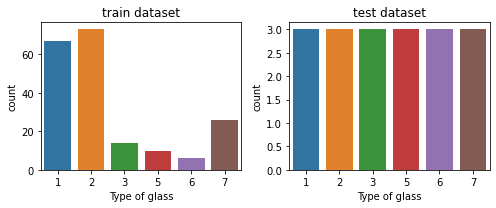

In [10]:
# Analysis of Distribution in Categorical dependent variable

plt.rcParams["figure.figsize"] = [7.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(train['Type of glass'], ax=axes[0]).set(title='train dataset')
sns.countplot(test['Type of glass'],ax=axes[1]).set(title='test dataset')
plt.show()

- Train dataset seems to be categorically imbalanced because glass type 1 and 2 have high count compared to other glass types

Text(0.5, 0.98, 'Train dataset Correlation Heatmap')

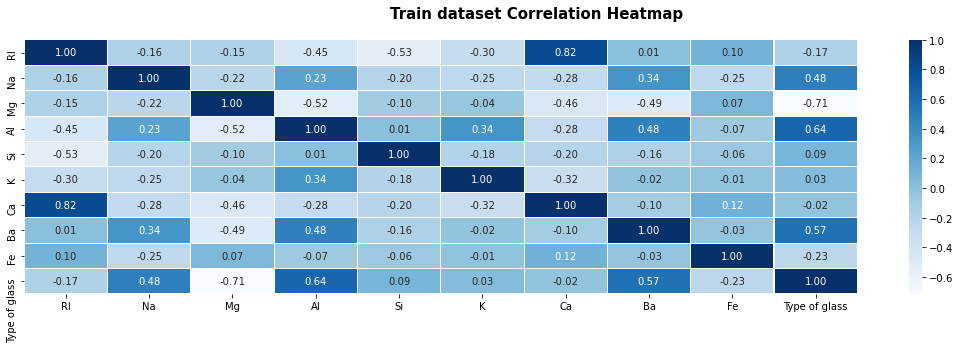

In [11]:
# Correlation (in train dataset)

fig, (ax) = plt.subplots(1, 1, figsize=(15,5)) 
hm = sns.heatmap(train.corr(),ax=ax,cmap="Blues",annot=True,fmt='.2f',linewidths=.05)
fig.subplots_adjust(top=0.5) 
fig.suptitle('Train dataset Correlation Heatmap', fontsize=15, fontweight='bold')

- Na, Ba and Al have positive correlation with categorical dependent variable (Type of glass)
- Type of glass has negative corelation with Mg

### Standardization of data

In [12]:
X_train = train.drop(columns = ['Type of glass']).values
y_train = train['Type of glass'].values

X_test = test.drop(columns = ['Type of glass']).values
y_test = test['Type of glass'].values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting KNN to the Training dataset to find best K value

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=6)))

K value  :  1  train score :  1.0  score :  0.6220012626262627
K value  :  2  train score :  0.8418367346938775  score :  0.6218434343434344
K value  :  3  train score :  0.8520408163265306  score :  0.627209595959596
K value  :  4  train score :  0.7959183673469388  score :  0.6220012626262625
K value  :  5  train score :  0.8010204081632653  score :  0.6223169191919191
K value  :  6  train score :  0.7806122448979592  score :  0.6379419191919191
K value  :  7  train score :  0.7346938775510204  score :  0.6278409090909091
K value  :  8  train score :  0.7551020408163265  score :  0.6177398989898989
K value  :  9  train score :  0.7244897959183674  score :  0.6025883838383838
K value  :  10  train score :  0.7142857142857143  score :  0.6125315656565656
K value  :  20  train score :  0.6938775510204082  score :  0.6380997474747475
K value  :  50  train score :  0.6224489795918368  score :  0.5666035353535354


- From hit and trial, we found K = 6 is the best value of hyper parameter(k) and it has the highest cross validation score.

### Square Euclidean and Manhattan distance

In [15]:
# Fitting KNN (K=6) to training set
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
euclid_model = KNeighborsClassifier(n_neighbors=6, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=6, metric=distance.cityblock) # Manhattan distance model

euclid_model.fit(X_train_scaled,y_train) # Train models
manhattan_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric=<function cityblock at 0x000001987A6990D0>,
                     n_neighbors=6)

In [16]:

# Make predictions
euclid_predictions = euclid_model.predict(X_test_scaled)
manhattan_predictions = manhattan_model.predict(X_test_scaled)
 
df = pd.DataFrame({'Actual': y_test, 'Euclidean': euclid_predictions, 'Manhattan': manhattan_predictions})
df

,Actual,Euclidean,Manhattan
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1
5,2,2,2
6,3,2,1
7,3,1,1
8,3,2,1
9,5,5,2


In [20]:
from sklearn.metrics import classification_report

# Evaluate performance
euclid_count = len(df.loc[df['Euclidean'] == df['Actual']])
manhattan_count = len(df.loc[df['Manhattan'] == df['Actual']])

print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['Actual'].astype(str).unique()))

print ('\n')

print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['Actual'].astype(str).unique()))


Square Euclidean Accuracy: 55.56%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.61      0.56      0.50        18
weighted avg       0.61      0.56      0.50        18



Manhattan Accuracy: 50.0%
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy   

- Square Euclidean has a better accuracy score of 55.56% compared to Manhattan's 50%